<a href="https://colab.research.google.com/github/mar-esther23/LIBB_Mathematics/blob/main/ISB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: The magic of change and how to find it

The code is based on examples from the book Introduction to Systems Biology: Workbook for Flipped-classroom Teaching by Sauter, T., & Albrecht, M. (2023, p. 170).

## Feedforward loop system of equations (Example 1)

System of equations

$$
\left\{\begin{array}{@{}l@{}}
  \frac{dX}{dt} = k_1 S_x - k_1 X \\
  \frac{dY}{dt} = k_2 X - k_2 Y \\
  \frac{dZ}{dt} = k_3 Y_{\text{eff}} X - k_3 Z \\
  \end{array}\right.\,
$$

Where
$$
Y_{eff} =
   \left\{\begin{array}{lr}
       Y-Y_{thr}, & Y>Y_{thr} \\
       0, & Y \leq Y_{thr}
    \end{array}\right.
$$


In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# !pip install ipywidgets
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

### Simple plot with initial parameters

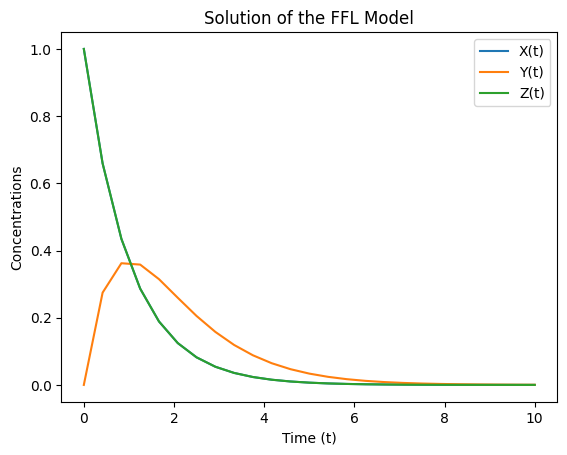

In [16]:
# Parameters
Sx = 0  # Source term for X
k1 = 1  # Rate constant for X
k2 = 1  # Rate constant for Y
k3 = 1  # Rate constant for Z
thrY = 0.5  # Threshold for Yeff

# Initial conditions
initial_conditions = [1, 0, 1]

# Time points
t = np.linspace(0, 10, 25)

# Model equations
def FFL_model(state, t, Sx, k1, k2, k3, thrY):
    X, Y, Z = state
    Y_eff = np.maximum(0, Y - thrY)    # Pesima condicion
    dX_dt = k1 * Sx - k1 * X
    dY_dt = k2 * X - k2 * Y
    dZ_dt = k3 * Y_eff * X - k3 * Z # Implications of constant losing
    return [dX_dt, dY_dt, dZ_dt]

# Solve the system of ODEs
solution = odeint(FFL_model, initial_conditions, t, args=(Sx, k1, k2, k3, thrY))

# Extract the results for X(t), Y(t), and Z(t)
X_t = solution[:, 0]
Y_t = solution[:, 1]
Z_t = solution[:, 2]
# Plot the results
plt.plot(t, X_t, label='X(t)')
plt.plot(t, Y_t, label='Y(t)')
plt.plot(t, Z_t, label='Z(t)')
plt.title('Solution of the FFL Model')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations')
plt.legend()
plt.show()


### Plot with all initial conditions

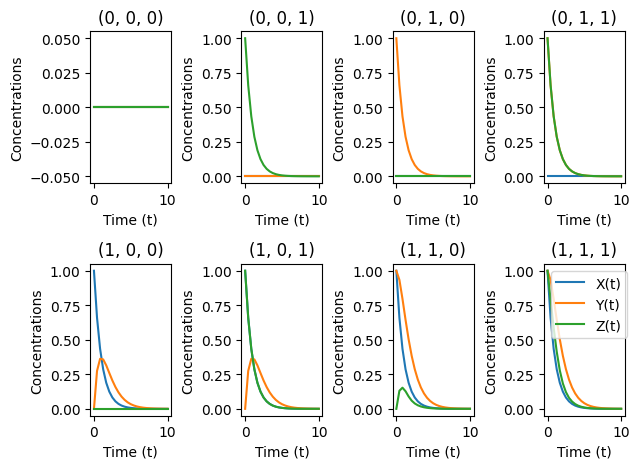

In [17]:
from itertools import product

# Creating subplots
fig, axs = plt.subplots(2,4)

# Iterate initial conditiosn
for ini in product([0,1], repeat=3):
    i, j, = ini[0], ini[1]*2+ini[2]
    # Solve the system of ODEs
    solution = odeint(FFL_model, ini, t, args=(Sx, k1, k2, k3, thrY))
    # Plot the results
    axs[i,j].plot(t, solution[:, 0], label='X(t)')
    axs[i,j].plot(t, solution[:, 1], label='Y(t)')
    axs[i,j].plot(t, solution[:, 2], label='Z(t)')
    axs[i,j].set_title(f"{ini}")
    axs[i,j].set_xlabel('Time (t)')
    axs[i,j].set_ylabel('Concentrations')

plt.legend()
plt.tight_layout()
plt.show()

## Simple feedback with exponential function (Figure 23)

Differential equation: $\frac{dx}{dt} = -k_{neg} x$ for $k_{neg}>0, \, x(t=0)=1$

Solution:   $x(t)=x_0 e ^{-k_{neg}t}$

Steady state:  $x=0$



### Simple plot for one value of k
Code to simulate the model for a set of parameters

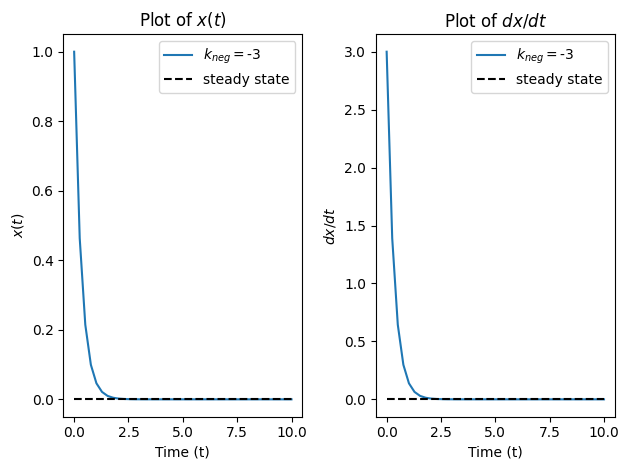

In [18]:
# Parameters
k = -3  # decay constant
x0 = 1  # initial condition
t = np.linspace(0, 10, 40) # time

# Differential equation model
def d_exp(x, t, k):
    return k * x

# Steady state
x_ss = 0

# Solve ODE and get x(t)
x_t = odeint(d_exp, x0, t, args=(k,))

# Calculate dx/dt
dx_dt = -k * x_t

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                             [r"$x(t)$", r"$dx/dt$"]):
    ax.plot(t, y, label=r"$k_{neg}=$"+str(k))
    ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
              label="steady state")
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

### Interactive widget for parameter k

In [19]:
# Parameters
x0 = 1  # Initial condition for x(0)

# Function to update plot when k is changed
def plot_solution(k):
    x_t = odeint(d_exp, x0, t, args=(k,)) # Solve ODE and get x(t)
    dx_dt = -k * x_t # Calculate dx/dt
    x_ss = 0 # Steady state
    # Creating subplots
    fig, axs = plt.subplots(1,2)
    # Plot x(t) and dx/dt in separate subplots
    for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                                [r"$x(t)$", r"$dx/dt$"]):
        ax.plot(t, y, label=r"$k=$"+str(k))
        ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
                  label="steady state")
        ax.set_xlabel('Time (t)')
        ax.set_ylabel(title)
        ax.set_title(f"Plot of {title}")
        ax.legend()
    plt.tight_layout()
    plt.show()

# Create an interactive widget for k
interact(plot_solution, k=FloatSlider(min=-5.0, max=5.0, step=0.5, value=-3));

interactive(children=(FloatSlider(value=-3.0, description='k', max=5.0, min=-5.0, step=0.5), Output()), _dom_c…

### Plot with various values of k



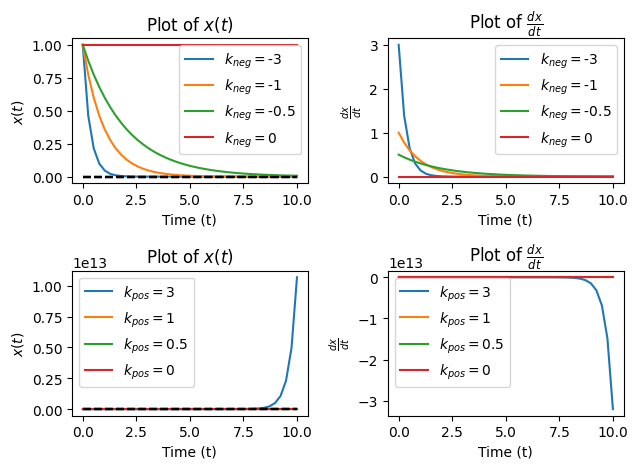

In [20]:
# Parameters
x0 = 1
kneg_list = [-3,-1,-0.5,0]
kpos_list = [3,1,0.5,0]

# Creating subplots
fig, axs = plt.subplots(2,2)

# Plot x(t) and dx/dt in separate subplots
for k in kneg_list:
    # Calculate
    x_t = odeint(d_exp, x0, t, args=(k,)) # Solve ODE and get x(t)
    dx_dt = -k * x_t # Calculate dx/dt
    x_ss = 0 # Steady state
    # Plot x(t)
    axs[0,0].plot(t, x_t, label=r"$k_{neg}=$"+str(k))
    axs[0,0].hlines(x_ss, t.min(), t.max(), color='black', linestyle='dashed')
    # Plot dx/dt
    axs[0,1].plot(t, dx_dt, label=r"$k_{neg}=$"+str(k))
    axs[0,0].hlines(x_ss, t.min(), t.max(), color='black', linestyle='dashed')

for k in kpos_list:
    # Calculate
    x_t = odeint(d_exp, x0, t, args=(k,)) # Solve ODE and get x(t)
    dx_dt = -k * x_t # Calculate dx/dt
    x_ss = 0 # Steady state
    # Plot x(t)
    axs[1,0].plot(t, x_t, label=r"$k_{pos}=$"+str(k))
    axs[1,0].hlines(x_ss, t.min(), t.max(), color='black', linestyle='dashed')
    # Plot dx/dt
    axs[1,1].plot(t, dx_dt, label=r"$k_{pos}=$"+str(k))
    axs[1,0].hlines(x_ss, t.min(), t.max(), color='black', linestyle='dashed')

# Plot title and labels
for ax_row in axs:
  for ax, title in zip(ax_row, [r"$x(t)$", r"$\frac{dx}{dt}$"]):
      ax.set_xlabel('Time (t)')
      ax.set_ylabel(title)
      ax.set_title(f"Plot of {title}")
      ax.legend()

plt.tight_layout()
plt.show()

### Direction field

In [21]:
# Parameters
x = np.linspace(0, 10, 20)  # x points (state)
t = np.linspace(0, 10, 20)  # t points (state)

# Function to update plot when k is changed
def plot_solution(k):
    # Create a grid of (t, x) points
    T, X = np.meshgrid(t, x)
    # Compute the slopes dx/dt = -k * x for the grid points
    dX = k * X
    dT = np.ones_like(T)  # Time derivative is 1
    # Plotting the direction field
    plt.quiver(T, X, dT, dX, color='hotpink')  # Quiver plot for direction field
    plt.title(r"Direction Field for $x'(t) = k \cdot x$")
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.show()

# Create an interactive widget for k
interact(plot_solution, k=FloatSlider(min=-5.0, max=5.0, step=0.5, value=-1));

interactive(children=(FloatSlider(value=-1.0, description='k', max=5.0, min=-5.0, step=0.5), Output()), _dom_c…

## Saturated feedback with Michaelis-Menten (Figure 25)

Differential equation:
$\frac{dx}{dt} = -k_{neg}x + \dfrac{c\cdot x}{x+1/k_{pos}}$

Steady state:
$x=0$ and $x=\frac{c\cdot k_{pos}-k_{neg}}{k_{pos}k_{neg}}$



### Simple plot for one value of k
Code to simulate the model for a set of parameters

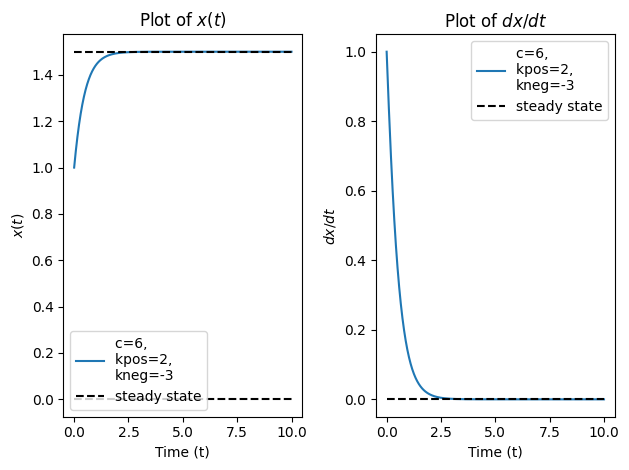

In [22]:
# Parameters
kneg = 3  # negative feedback
kpos = 2  # positive feedback
c = 6 #Vmax
x0 = 1   # initial condition
t = np.linspace(0, 10, 400) # time

# Differential equation model accepting parameter k
def d_feedback(x, t, kneg, kpos, c):
    return -kneg*x + c*x/(x+1/kpos)

# Solve ODE and get x(t)
x_t = odeint(d_feedback, x0, t, args=(kneg, kpos, c))

# Calculate dx/dt
dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)

# Steady states
x_ss = [0, (c*kpos-kneg)/(kpos*kneg)]

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                             [r"$x(t)$", r"$dx/dt$"]):
    ax.plot(t, y, label=f"c={c}, \nkpos={round(kpos,3)}, \nkneg=-{kneg}")
    ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
              label="steady state")
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

### Interactive widget for parameters

In [23]:
# Function to update plot when k is changed
def plot_solution(x0, kneg, kpos, c):
    x_t = odeint(d_feedback, x0, t, args=(kneg, kpos, c)) # Solve ODE and get x(t)
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos) # Calculate dx/dt
    x_ss = [0, (c*kpos-kneg)/(kpos*kneg)] # Steady state
    # Creating subplots
    fig, axs = plt.subplots(1,2)
    # Plot x(t) and dx/dt in separate subplots
    for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                                [r"$x(t)$", r"$dx/dt$"]):
        ax.plot(t, y, label=f"c={c}, \nkpos={round(kpos,3)}, \nkneg=-{kneg}")
        ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
                  label="steady state")
        ax.set_xlabel('Time (t)')
        ax.set_ylabel(title)
        ax.set_title(f"Plot of {title}")
        ax.legend()
    plt.tight_layout()
    plt.show()

# Create an interactive widget for k
interact(plot_solution,
         x0=FloatSlider(min=0, max=5.0, step=0.5, value=1),
         kneg=FloatSlider(min=0, max=5.0, step=0.5, value=3),
         kpos=FloatSlider(min=0, max=5.0, step=0.25, value=2),
         c=FloatSlider(min=0, max=10.0, step=0.5, value=6),
         );

interactive(children=(FloatSlider(value=1.0, description='x0', max=5.0, step=0.5), FloatSlider(value=3.0, desc…

### Plot with various values of $k_{pos}$

<ipython-input-22-17750e4814e4>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return -kneg*x + c*x/(x+1/kpos)
<ipython-input-24-c48d445dc38a>:17: RuntimeWarning: divide by zero encountered in scalar divide
  dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
<ipython-input-24-c48d445dc38a>:20: RuntimeWarning: divide by zero encountered in scalar divide
  xeq = [0, (c*kpos-kneg)/(kpos*kneg)]


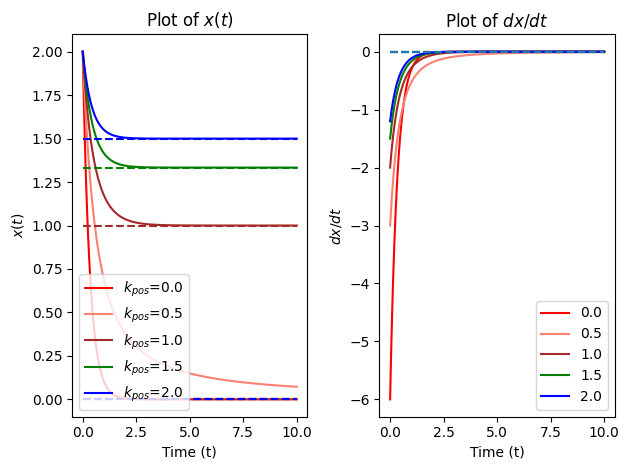

In [24]:
# Parameters
kneg = 3  # negative feedback
kpos = 2  # positive feedback
c = 6 # Vmax
x0 = 2 # initial condition
kpos_list = np.linspace(0, 2, 5)  # negative feedback
colors = ['r','salmon','brown','g','b']

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for kpos, color in zip(kpos_list, colors):
    # Solve ODE and get x(t)
    x_t = odeint(d_feedback, x0, t, args=(kneg, kpos, c))
    # Calculate dx/dt
    dx_dt = -kneg*x_t + c*x_t/(x_t+1/kpos)
    # Plot x_t and steady
    axs[0].plot(t, x_t, label=r"$k_{pos}$="+str(kpos), color=color)
    xeq = [0, (c*kpos-kneg)/(kpos*kneg)]
    axs[0].hlines(xeq, t.min(), t.max(), linestyle='dashed', color=color)
    # Plot dxdt and steady state
    axs[1].plot(t, dx_dt, label=r""+str(kpos), color=color)
    axs[1].hlines(0, t.min(), t.max(), linestyle='dashed')

# Plot title and labels
for ax, title in zip(axs, [r"$x(t)$", r"$dx/dt$"]):
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

### Direction field

In [25]:
# Parameters
x = np.linspace(0, 10, 20)  # x points (state)
t = np.linspace(0, 10, 20)  # t points (state)

# Function to update plot when k is changed
def plot_solution(x0, kneg, kpos, c):
    # Create a grid of (t, x) points
    T, X = np.meshgrid(t, x)
    # Compute the slopes dx/dt = -k * x for the grid points
    dX = -kneg*X + c*X/(X+1/kpos)
    dT = np.ones_like(T)  # Time derivative is 1
    # Plotting the direction field
    plt.quiver(T, X, dT, dX, color='hotpink')  # Quiver plot for direction field
    plt.title(r"Direction Field for $\frac{dx}{dt} = -k_{neg}x + \dfrac{c\cdot x}{x+1/k_{pos}}$")
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.show()


# Create an interactive widget for k
interact(plot_solution,
         x0=FloatSlider(min=0, max=5.0, step=0.5, value=1),
         kneg=FloatSlider(min=0, max=5.0, step=0.5, value=3),
         kpos=FloatSlider(min=0, max=5.0, step=0.25, value=2),
         c=FloatSlider(min=0, max=10.0, step=0.5, value=6),
         );

interactive(children=(FloatSlider(value=1.0, description='x0', max=5.0, step=0.5), FloatSlider(value=3.0, desc…

### Phase plane for $k_{neg}$ and $k_{pos}$

<ipython-input-22-17750e4814e4>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return -kneg*x + c*x/(x+1/kpos)
<ipython-input-26-355d8da8198e>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_final[j, i] = sol[-1]  # Value of x at t = 10


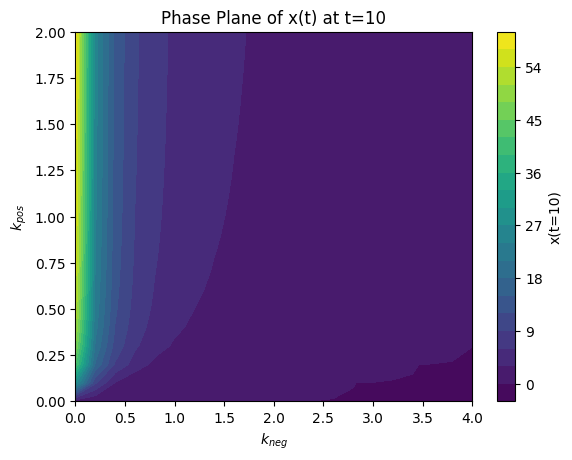

In [26]:
# Parameters
x0 = 1  # initial condition for x
t_final = 10
t = np.linspace(0, t_final, 20)

# Range of kneg and kpos values
kneg_max = 4
kpos_max = 2
kneg_values = np.linspace(0, kneg_max, 21)
kpos_values = np.linspace(0, kpos_max, 21)

# Meshgrid for phase plane
KNEG, KPOS = np.meshgrid(kneg_values, kpos_values)

# Compute the values of x at time t=10 for each (kneg, kpos) pair
X_final = np.zeros_like(KNEG)

for i in range(len(kneg_values)):
    for j in range(len(kpos_values)):
        sol = odeint(d_feedback, x0, t, args=(kneg_values[i], kpos_values[j], c))
        X_final[j, i] = sol[-1]  # Value of x at t = 10

# Plotting the phase plane
plt.contourf(KNEG, KPOS, X_final, levels=20, cmap='viridis')
plt.colorbar(label='x(t=10)')
plt.title('Phase Plane of x(t) at t=10')
plt.xlabel('$k_{neg}$')
plt.ylabel('$k_{pos}$')
plt.show()

<ipython-input-13-17750e4814e4>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return -kneg*x + c*x/(x+1/kpos)
<ipython-input-18-ff74fc6979bb>:14: RuntimeWarning: divide by zero encountered in scalar divide
  X_ss.append(  (c*kpos-kneg)/(kpos*kneg)  )


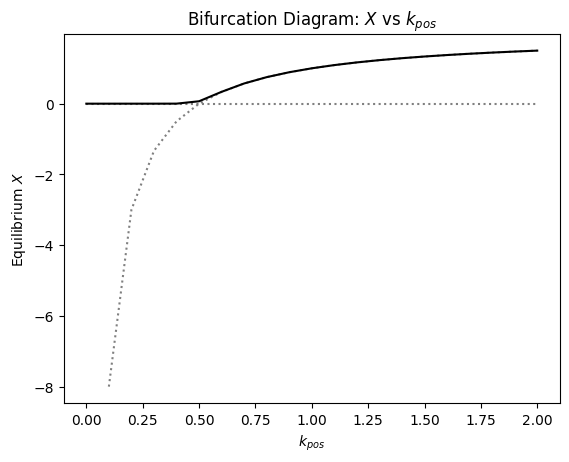

In [ ]:
# Parameters
x0 = 1  # initial condition for x
kneg = 3
c = 6
kpos_values = np.linspace(0, 2, 21)
t_final = 10
t = np.linspace(0, t_final, 20)

# Solve ODE for each kpos and record the equilibrium value of X
X_final, X_ss = [], []
for kpos in kpos_values:
    x_t = odeint(d_feedback, x0, t, args=(kneg, kpos, c))
    X_final.append(x_t[-1])  # Steady state at the end of the time
    X_ss.append(  (c*kpos-kneg)/(kpos*kneg)  )

# Plotting the bifurcation diagram
plt.hlines(0, 0, kpos_values.max(), linestyle='dotted', color='grey') #zero
plt.plot(kpos_values, X_ss, linestyle='dotted', color='grey') # steady state
plt.plot(kpos_values, X_final, color='black') # value at time 10
plt.title(r"Bifurcation Diagram: $X$ vs $k_{pos}$")
plt.xlabel(r"$k_{pos}$")
plt.ylabel(r"Equilibrium $X$")
plt.show()

## Toggle switch motif (Example 11)


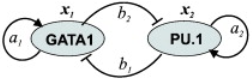


$$
\dot x_1 = a_1 \cdot \dfrac{x_1^n}{tha_1^n+x_1^n} + b_1 \cdot \dfrac{thb_1^n}{thb_1^n+x_2^n} - k_1 \cdot x_1 \\
\dot x_2 = a_2 \cdot \dfrac{x_2^n}{tha_2^n+x_2^n} + b_2 \cdot \dfrac{thb_2^n}{thb_2^n+x_1^n} - k_2 \cdot x_2
$$

### Analysing the terms of the system

| derivate | activation (Hill equation) | inhibition (Hill equation) | degradation |
|----------|------------|------------|-------------|
| $\dot x_1 =$ | +$a_1 \cdot \dfrac{x_1^n}{tha_1^n+x_1^n}$ | $+b_1 \cdot \dfrac{thb_1^n}{thb_1^n+x_2^n}$ | $-k_1 \cdot x_1$ |

In [ ]:
# Parameters
t = np.linspace(0,100,500)

def f_hill_act(x, t, n, a1, tha1):
    return a1 * x**n / (tha1**n + x**n)

# Function to update plot when k is changed
def plot_solution(x0, n, a1, tha1):
    x_t = odeint(f_hill_act, x0, t, args=(n, a1, tha1)) # Solve ODE and get x(t)
    dx_dt = (a1 * x_t**n) / (tha1**n + x_t**n) # Calculate dx/dt
    x_ss = [0] # Steady states

    # Plot x_T ad dx/dt
    fig, axs = plt.subplots(1,2)
    for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                                [r"$x(t)$", r"$dx/dt$"]):
        ax.plot(t, y, label=f"n={n}, \na1={a1}, \ntha1=a{tha1}")
        ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
                  label="steady state")
        ax.set_xlabel('Time (t)')
        ax.set_ylabel(title)
        ax.set_title(f"Plot of {title}")
        ax.legend()
    plt.tight_layout()
    plt.show()

# Create an interactive widget
interact(plot_solution,
         x0=FloatSlider(min=0, max=2, step=0.1, value=1),
         n=FloatSlider(min=0, max=10, step=0.5, value=4),
         a1=FloatSlider(min=0, max=2, step=0.1, value=1),
         tha1=FloatSlider(min=0, max=2, step=0.1, value=0.5),
         );

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0), FloatSlider(value=4.0, description='n…

In [ ]:
# Parameters
t = np.linspace(0,100,500)

def f_hill_neg(x, t, n, b1, thb1):
    return b1 * thb1**n / (thb1**n + x**n)

# Function to update plot when k is changed
def plot_solution(x0, n, b1, thb1):
    x_t = odeint(f_hill_neg, x0, t, args=(n, b1, thb1)) # Solve ODE and get x(t)
    dx_dt = b1 * thb1**n / (thb1**n + x_t**n) # Calculate dx/dt
    x_ss = [0] # Steady states

    # Plot x_T ad dx/dt
    fig, axs = plt.subplots(1,2)
    for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                                [r"$x(t)$", r"$dx/dt$"]):
        ax.plot(t, y, label=f"n={n}, \na1={b1}, \ntha1=a{thb1}")
        ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
                  label="steady state")
        ax.set_xlabel('Time (t)')
        ax.set_ylabel(title)
        ax.set_title(f"Plot of {title}")
        ax.legend()
    plt.tight_layout()
    plt.show()

# Create an interactive widget
interact(plot_solution,
         x0=FloatSlider(min=0, max=2, step=0.1, value=1),
         n=FloatSlider(min=0, max=10, step=0.5, value=4),
         b1=FloatSlider(min=0, max=2, step=0.1, value=1),
         thb1=FloatSlider(min=0, max=2, step=0.1, value=0.5),
         );

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0), FloatSlider(value=4.0, description='n…

### Simple plot for one set of parameters

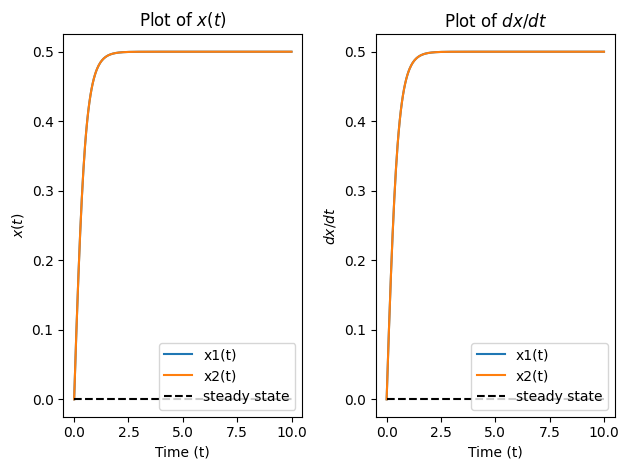

In [ ]:
# Parameters
n = 4
k1 = 1
k2 = 1
tha1 = 0.5
tha2 = 0.5
thb1 = 0.5
thb2 = 0.5
a1 = 0
a2 = 0
b1 = 1
b2 = 1

# Initial conditions
x1_0 = 0
x2_0 = 0

# Time points
t = np.linspace(0, 10, 400)

# Model equations
def toggle_switch(X, t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2):
    x1, x2 = X
    dx1_dt = (a1 * x1**n / (tha1**n + x1**n)) + (b1 * thb1**n / (thb1**n + x2**n)) - k1 * x1
    dx2_dt = (a2 * x2**n / (tha2**n + x2**n)) + (b2 * thb2**n / (thb2**n + x1**n)) - k2 * x2
    return [dx1_dt, dx2_dt]

# Solve ODEs
sol = odeint(toggle_switch, [x1_0, x2_0], t, args=(n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2))

# Steady state
x_ss = 0

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for ax, y, y_ss, title in zip(axs, [x_t, dx_dt], [x_ss, 0],
                             [r"$x(t)$", r"$dx/dt$"]):
    ax.plot(t, sol[:, 0], label='x1(t)')
    ax.plot(t, sol[:, 1], label='x2(t)')
    ax.hlines(y_ss, t.min(), t.max(), color='black', linestyle='dashed',
              label="steady state")
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()

plt.tight_layout()
plt.show()

### Direction field

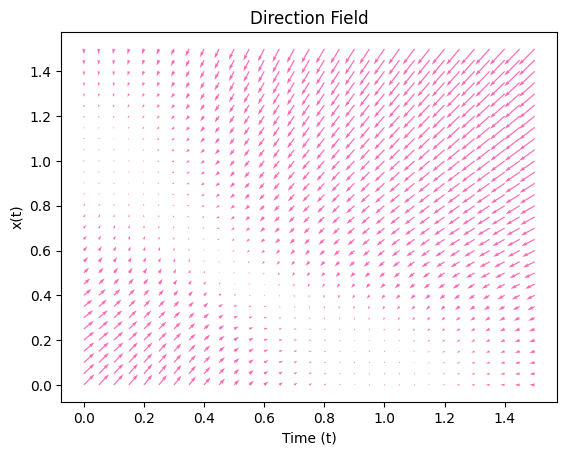

In [ ]:
# Parameters

# Create a grid of (t, x) points
x1 = np.linspace(0, 1.5, 16)  # x points (state)
x2 = np.linspace(0, 1.5, 16)  # t points (state)
X1, X2 = np.meshgrid(x1, x2)
# Compute the slopes dx/dt = -k * x for the grid points
dX1 = (a1 * X1**n / (tha1**n + X1**n)) + (b1 * thb1**n / (thb1**n + X2**n)) - k1 * X1
dX2 = (a2 * X2**n / (tha2**n + X2**n)) + (b2 * thb2**n / (thb2**n + X1**n)) - k2 * X2
# Plotting the direction field
plt.quiver(X1, X2, dX1, dX2, color='hotpink')  # Quiver plot for direction field
plt.title(r"Direction Field")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()



In [ ]:
from itertools import product

solutions = list()
for ini in product(x1, x2):
    sol = fsolve(toggle_switch, (ini), args=(t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2))
    x1_ss, x2_ss = solution
    x1_ss, x2_ss = round(x1_ss,3), round(x2_ss,3)
    solutions.append((x1_ss, x2_ss))
solutions = set(solutions)
solutions

{(0.5, 0.5)}

Get roots

In [ ]:
sol = fsolve(toggle_switch, (0,1), args=(t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2))
sol

array([0.05886609, 0.99980791])

In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Parameters
n = 4
k1 = 1
k2 = 1
tha1 = 0.5
tha2 = 0.5
thb1 = 0.5
thb2 = 0.5
a1 = 0
a2 = 0
b1 = 1
b2 = 1

# System of equations representing the steady-state conditions
def toggle_switch(X, t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2):
    x1, x2 = X
    dx1_dt = (a1 * x1**n / (tha1**n + x1**n)) + (b1 * thb1**n / (thb1**n + x2**n)) - k1 * x1
    dx2_dt = (a2 * x2**n / (tha2**n + x2**n)) + (b2 * thb2**n / (thb2**n + x1**n)) - k2 * x2
    return [dx1_dt, dx2_dt]

# Initial guess for x1 and x2
initial_guess = np.linspace(-1,3, num=25)

for ini in initial_guess:
    # Solve the system of equations
    solution = fsolve(toggle_switch, (ini,ini), args=(t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2))
    # Extract the solutions
    x1_steady, x2_steady = solution
    print(f"Steady-state values: x1 = {round(x1_steady,3)}, x2 = {round(x2_steady,3)}")


Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = -0.686, x2 = -0.686
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 = 0.5
Steady-state values: x1 = 0.5, x2 

<ipython-input-44-2dd6dc716971>:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(toggle_switch, (ini,ini), args=(t, n, k1, k2, tha1, tha2, thb1, thb2, a1, a2, b1, b2))


In [ ]:
from sympy import *

x, y = symbols('x, y')
eq1 = Eq(x+y**2, 4)
eq2 = Eq(x**2 + y, 4)

sol = solve([eq1, eq2], [x, y])
sol

[(-(-5/2 - sqrt(17)/2)*(3/2 - sqrt(17)/2), -sqrt(17)/2 - 1/2),
 (-(-5/2 + sqrt(17)/2)*(3/2 + sqrt(17)/2), -1/2 + sqrt(17)/2),
 (-(-3/2 + sqrt(13)/2)*(sqrt(13)/2 + 5/2), 1/2 + sqrt(13)/2),
 (-(5/2 - sqrt(13)/2)*(-sqrt(13)/2 - 3/2), 1/2 - sqrt(13)/2)]

In [ ]:
x1,x2 = symbols('x1,x2')

dx1_dt = Eq( (a1 * x1**n / (tha1**n + x1**n)) + (b1 * thb1**n / (thb1**n + x2**n)) - k1 * x1 , 0)
dx2_dt = Eq( (a2 * x2**n / (tha2**n + x2**n)) + (b2 * thb2**n / (thb2**n + x1**n)) - k2 * x2 , 0)

sol = solve([dx1_dt, dx2_dt], [x1, x2])
sol

KeyboardInterrupt: 